In [43]:
### In front of the coding, I want to say this is just a replication of my one-year before code. When I tried to use ARIMA model to modedl
### financial data, I don't know much behind the statistical theorem. Now after one year learning, I got to say ARIMA model is too simple to model any
### stock data. Time series is good, but stock is more beyond time. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('GOOG.csv',encoding='utf-8',index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-02,39.689999,40.134998,39.599998,39.926498,39.926498,30642000
2017-02-03,40.149502,40.299999,40.018501,40.074501,40.074501,29268000
2017-02-06,39.985001,40.083500,39.762501,40.067001,40.067001,23690000
2017-02-07,40.199501,40.525002,40.089001,40.348499,40.348499,24824000
2017-02-08,40.349998,40.591999,40.159500,40.418999,40.418999,23106000
...,...,...,...,...,...,...
2022-07-20,114.059998,116.330002,113.260002,114.699997,114.699997,26780100
2022-07-21,115.089996,115.209999,111.910004,115.040001,115.040001,27267800
2022-07-22,111.809998,113.180000,107.599998,108.360001,108.360001,44404100


In [4]:
from datetime import datetime
df.index=pd.to_datetime(df.index)
GOOG_price=df['Open']
pd.to_numeric(GOOG_price)

Date
2017-02-02     39.689999
2017-02-03     40.149502
2017-02-06     39.985001
2017-02-07     40.199501
2017-02-08     40.349998
                 ...    
2022-07-20    114.059998
2022-07-21    115.089996
2022-07-22    111.809998
2022-07-25    108.879997
2022-07-26    107.430000
Name: Open, Length: 1379, dtype: float64

In [5]:
## we need to do the differencing about the price first to make it stationary

In [6]:
from statsmodels.tsa.stattools import adfuller
stock_differencing= GOOG_price.diff().dropna()
result = adfuller(stock_differencing)
print(result) ##it is more negative than the critical value

(-39.02951165981329, 0.0, 0, 1377, {'1%': -3.4351078301822016, '5%': -2.8636412316027577, '10%': -2.5678886927682663}, 5049.996948146581)


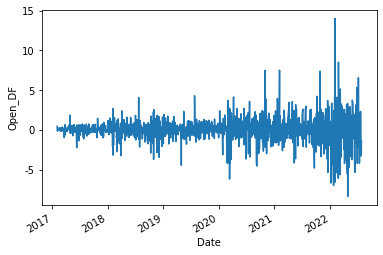

In [7]:
plt.rcParams['axes.unicode_minus'] = False 
plt.xticks(rotation=45)
plt.xlabel('Date') 
plt.ylabel('Open_DF')
stock_differencing.plot()
plt.show() 

In [8]:
from statsmodels.tsa import stattools
LjungBox=stattools.q_stat(stattools.acf(stock_differencing)[1:20],len(stock_differencing))[1]
LjungBox ##past the test

array([0.05588667, 0.15737009, 0.12589777, 0.08606634, 0.08232265,
       0.06911251, 0.10573356, 0.12017493, 0.1201711 , 0.05880722,
       0.08395438, 0.0627822 , 0.08748834, 0.09249532, 0.11550776,
       0.1305426 , 0.15250389, 0.17219678, 0.2082671 ])

In [9]:
## to decide the parameter of ARIMA using ACF and PACF

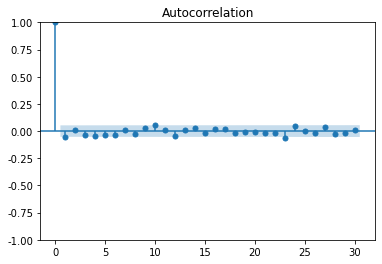

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(stock_differencing,use_vlines=True,lags=30) 
plt.show()

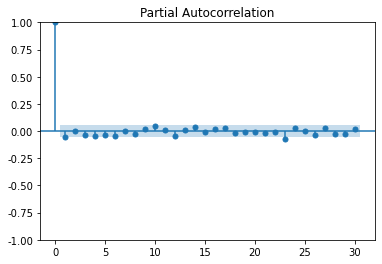

In [11]:
plot_pacf(stock_differencing,use_vlines=True,lags=30) 
plt.show()

In [12]:
##from the acf and pacf we can chose arima(3,1,3)， the aic is smallest

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(GOOG_price,order=(3,1,3)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 1379
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2551.706
Date:                Thu, 28 Jul 2022   AIC                           5117.412
Time:                        00:04:41   BIC                           5154.011
Sample:                             0   HQIC                          5131.104
                               - 1379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3389      0.420      3.187      0.001       0.516       2.162
ar.L2          0.0251      0.765      0.033      0.974      -1.474       1.524
ar.L3         -0.4816      0.378     -1.274      0.203      -1.222       0.259
ma.L1         -1.4038      0.425     -3.303      0.001      -2.237      -0.571
ma.L2          0.0454      0.794      0.057      0.954      -1.510       1.601
ma.L3          0.4673      0.400      1.169      0.242      -0.316       1.251
sigma2         2.3753      0.041     57.358      0.000       2.294       2.456
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              4812.41
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               7.70   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
model.conf_int()

,0,1
ar.L1,0.515568,2.162200
ar.L2,-1.473510,1.523750
ar.L3,-1.222238,0.259056
ma.L1,-2.236865,-0.570667
ma.L2,-1.509877,1.600617
ma.L3,-0.316259,1.250859
sigma2,2.294131,2.456462


In [15]:
a=model.forecast(10)
a

1379    107.826679
1380    108.099341
1381    108.303317
1382    108.392229
1383    108.385084
1384    108.279519
1385    108.095181
1386    107.849163
1387    107.565981
1388    107.269430
Name: predicted_mean, dtype: float64